## Evaluation Phase

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys


from collections import namedtuple

%matplotlib inline
#
from evaluation import *
from approximator import *
from q_learning_nn import *

#import environment
sys.path.append(r'../virl')
import virl

import time
from datetime import date

In [3]:
#create training environment, I am using 
alpha = 0.00 #only run episode, not evaluation 
nn_config = [36,36]
BATCH_SIZE = 80
BUFFER_SIZE = 8000
num_episodes = 50

In [3]:

#load test environment

for num_instance in range(1):
    
    #run different instance
    for s_n in range(4):
        #set stochastic
        stochastic = bool((s_n//2)%2)
        noisy = bool(s_n%2) 

        env = virl.Epidemic(problem_id=num_instance, stochastic=stochastic, noisy=noisy)

        d_states = env.observation_space.shape[0]
        n_actions = env.action_space.n

        nn_approximator =  NNFunctionApproximatorJointKeras(alpha, d_states, n_actions, nn_config)
        nn_approximator_target =  NNFunctionApproximatorJointKeras(alpha, d_states, n_actions, nn_config)

        # Training   
        stats = q_learning_nn(env, nn_approximator, nn_approximator_target, num_episodes,
                        use_normalization = True,
                        max_steps_per_episode=500, 
                        epsilon_init=0.0, epsilon_decay=1.0, epsilon_min=0.00,
                        use_batch_updates=True, BATCH_SIZE=BATCH_SIZE,
                        fn_model_in=r"./data/approximator_training/cartpole0"+str(num_instance)+".h5", fn_model_out=None,
                        BUFFER_SIZE=BUFFER_SIZE) 
        #save stats
        stats_storage = Stats_storage(stats)
        save_variable(stats_storage, "./data/stats_evaluation/stats_eval0{}_{}{}.dat".format(num_instance, int(stochastic), int(noisy)))

         #output log
        t = time.localtime()
        current_time = time.strftime("%H:%M:%S", t)
        date = date.today()
        log = open("./data/evaluation.log", "a")
        log.write("problem_id = {} with stochatstic={} and noisy={} finished testing in {} {}\n".format(num_instance, stochastic, noisy, current_time, date))
        log.close()

episode: 49/50, score: 51, epsilon: 0.0

## load storage to evaluate

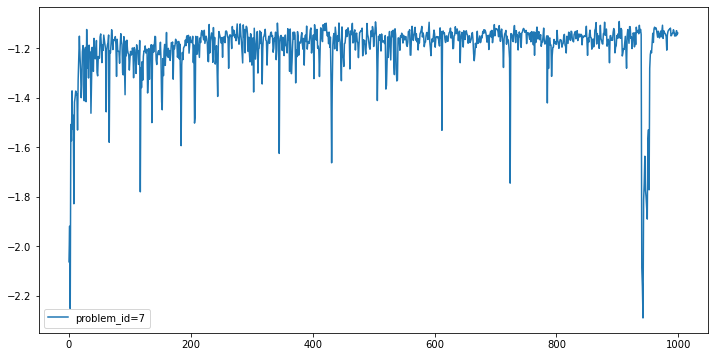

In [4]:
plt.figure(figsize=(12,6))
for i_instance in range(7, 8): 
    stats = load_variable("./data/stats_training/stats_train0{}.dat".format(i_instance))
    plot_rewards(stats, 1, problem_id=i_instance, smoothing_window = 1)